In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import pandas as pd

import matplotlib.pyplot as plt
import math

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
from sqlalchemy import inspect
insp = inspect(engine)
insp.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_temps = session.query(Base.classes.measurement.tobs).\
    filter(func.strftime("%m", Base.classes.measurement.date) == "06", 
          Base.classes.measurement.station == 'USC00519281').all()

In [7]:
#  3. Convert the June temperatures to a list.
June_temps_l = list(np.ravel(June_temps))

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temps_df = pd.DataFrame(June_temps_l)
June_temps_df.head()

,0
0,71.0
1,71.0
2,72.0
3,72.0
4,76.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temps_df.describe()

,0
count,236.000000
mean,73.271186
std,2.989801
min,65.000000
25%,71.000000
50%,73.000000
75%,75.000000
max,82.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_temps = session.query(Base.classes.measurement.tobs).\
    filter(func.strftime("%m", Base.classes.measurement.date) == "12", 
          Base.classes.measurement.station == 'USC00519281').all()

In [11]:
# 7. Convert the December temperatures to a list.
Dec_temps_l = list(np.ravel(Dec_temps))

In [27]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temps_df = pd.DataFrame(Dec_temps_l)
Dec_temps_df.head()

,0
0,72.0
1,71.0
2,72.0
3,74.0
4,66.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temps_df.describe()

,0
count,217.000000
mean,69.903226
std,3.803609
min,58.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,79.000000


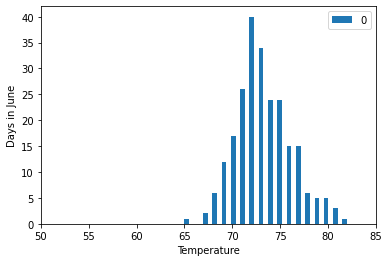

(None,
                 0
 count  236.000000
 mean    73.271186
 std      2.989801
 min     65.000000
 25%     71.000000
 50%     73.000000
 75%     75.000000
 max     82.000000)

In [28]:
June_temps_df.plot.hist(bins=35)
plt.xlabel('Temperature')
plt.ylabel('Days in June')
plt.xlim(50, 85)
plt.savefig('analysis/temp_june_plt.png')
plt.show(), June_temps_df.describe()

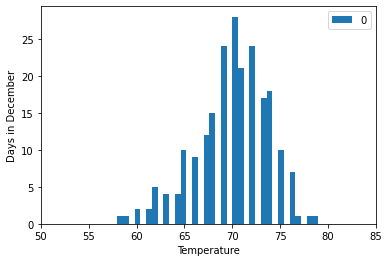

(None,
                 0
 count  217.000000
 mean    69.903226
 std      3.803609
 min     58.000000
 25%     68.000000
 50%     70.000000
 75%     73.000000
 max     79.000000)

In [29]:
Dec_temps_df.plot.hist(bins=35)
plt.xlabel('Temperature')
plt.ylabel('Days in December')
plt.xlim(50, 85)
plt.savefig('analysis/temp_dec_plt.png')
plt.show(), Dec_temps_df.describe()

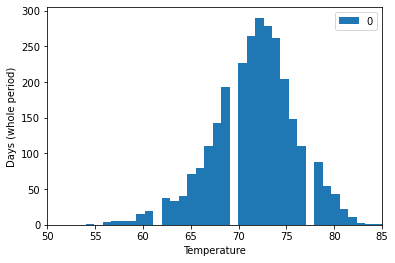

(None,
                  0
 count  2772.000000
 mean     71.663781
 std       4.357642
 min      54.000000
 25%      69.000000
 50%      72.000000
 75%      74.000000
 max      85.000000)

In [30]:
whole_per_temps = session.query(Base.classes.measurement.tobs).\
    filter(Base.classes.measurement.station == 'USC00519281').all()
whole_per_temps_l = list(np.ravel(whole_per_temps))
whole_per_temps_df = pd.DataFrame(whole_per_temps_l)
whole_per_temps_df.head()
whole_per_temps_df.plot.hist(bins=35)
plt.xlabel('Temperature')
plt.ylabel('Days (whole period)')
plt.xlim(50, 85)
plt.savefig('analysis/temp_whp_plt.png')
plt.show(), whole_per_temps_df.describe()

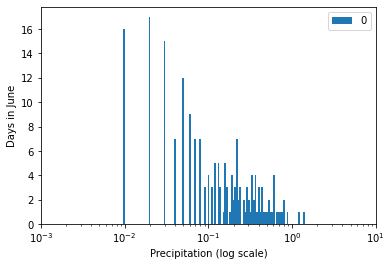

(None,
                 0
 count  236.000000
 mean     0.151525
 std      0.213496
 min      0.000000
 25%      0.010000
 50%      0.060000
 75%      0.212500
 max      1.390000)

In [33]:
June_prcps = session.query(Base.classes.measurement.prcp).\
    filter(func.strftime("%m", Base.classes.measurement.date) == "06", 
          Base.classes.measurement.station == 'USC00519281').all()
June_prcps_l = list(np.ravel(June_prcps))
June_prcps_df = pd.DataFrame(June_prcps_l)
start = -3
stop = 1
June_prcps_df.plot.hist(bins=np.logspace(start=start, stop=stop, num=200))
plt.xlabel('Precipitation (log scale)')
plt.ylabel('Days in June')
plt.xscale('log')
plt.xlim(10**start, 10**stop)
plt.savefig('analysis/prcp_june_plt.png')
plt.show(), June_prcps_df.describe()

In [31]:
June_prcps_df

,0
0,0.00
1,0.03
2,0.00
3,0.00
4,0.00
...,...
231,0.06
232,0.01
233,0.00
234,0.00


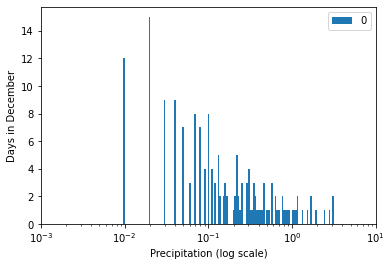

(None,
                 0
 count  217.000000
 mean     0.244931
 std      0.489789
 min      0.000000
 25%      0.010000
 50%      0.070000
 75%      0.230000
 max      3.140000)

In [34]:
Dec_prcps = session.query(Base.classes.measurement.prcp).\
    filter(func.strftime("%m", Base.classes.measurement.date) == "12", 
          Base.classes.measurement.station == 'USC00519281').all()
Dec_prcps_l = list(np.ravel(Dec_prcps))
Dec_prcps_df = pd.DataFrame(Dec_prcps_l)
Dec_prcps_df.head()
start = -3
stop = 1
Dec_prcps_df.plot.hist(bins=np.logspace(start=start, stop=stop, num=200))
plt.xlabel('Precipitation (log scale)')
plt.ylabel('Days in December')
plt.xscale('log')
plt.xlim(10**start, 10**stop)
plt.savefig('analysis/prcp_dec_plt.png')
plt.show(), Dec_prcps_df.describe()

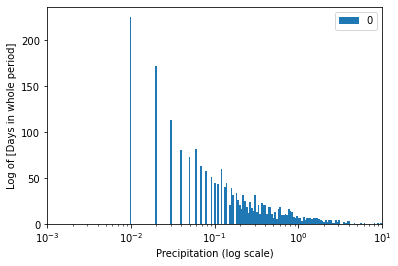

(None,
                  0
 count  2772.000000
 mean      0.212352
 std       0.543312
 min       0.000000
 25%       0.000000
 50%       0.040000
 75%       0.190000
 max       9.640000)

In [35]:
whole_per_prcps = session.query(Base.classes.measurement.prcp).\
    filter(Base.classes.measurement.station == 'USC00519281').all()
whole_per_prcps_l = list(np.ravel(whole_per_prcps))
whole_per_prcps_df = pd.DataFrame(whole_per_prcps_l)
whole_per_prcps_df.head()
whole_per_prcps_df.plot.hist(bins=np.logspace(start=start, stop=stop, num=200))
plt.xlabel('Precipitation (log scale)')
plt.ylabel('Log of [Days in whole period]')
plt.xscale('log')
plt.xlim(10**start, 10**stop)
plt.savefig('analysis/prcp_whp_plt.png')
plt.show(), whole_per_prcps_df.describe()

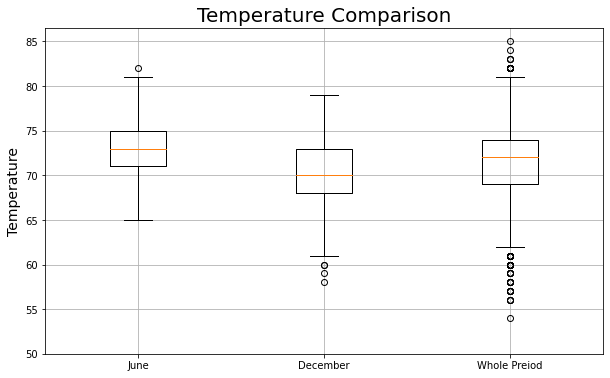

In [20]:
x_labels = ["June", "December","Whole Preiod"]
temp_data = [June_temps_df[0], Dec_temps_df[0], whole_per_temps_df[0]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Temperature Comparison',fontsize=20)
ax.set_ylabel('Temperature',fontsize=14)
# ax.set_xlabel("Temperature",fontsize=14)
ax.boxplot(temp_data, labels=x_labels)
ax.set_yticks(np.arange(50, 90, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/temp_box_plot.png")
plt.show()

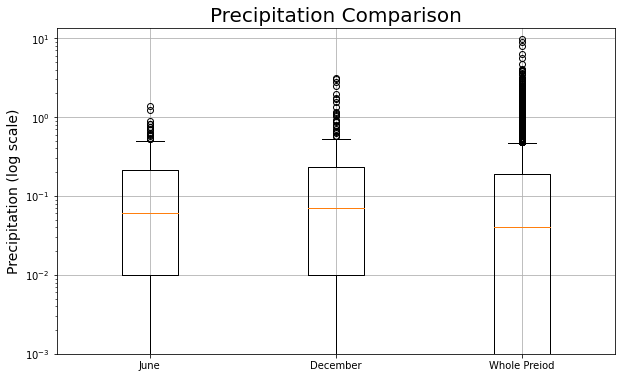

In [21]:
# x_labels = ["June", "December","Whole Preiod"]
# June_prcps_df[1] = [0 if p == 0 else math.log(p) for p in June_prcps_df[0]]
# Dec_prcps_df[1] = [0 if p == 0 else math.log(p) for p in Dec_prcps_df[0]]
# whole_per_prcps_df[1] = [0 if p == 0 else math.log(p) for p in whole_per_prcps_df[0]]
# prcp_data = [June_prcps_df[1], Dec_prcps_df[1], whole_per_prcps_df[1]]
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.set_title('Precipitation Comparison',fontsize=20)
# ax.set_ylabel('Log of [Precipitation]',fontsize=14)
# # ax.set_yscale('log')
# # ax.set_xlabel("Temperature",fontsize=14)
# ax.boxplot(prcp_data, labels=x_labels)
# ax.set_yticks(np.arange(math.floor(min(whole_per_prcps_df[1])), 
#                         math.ceil(max(whole_per_prcps_df[1])), 
#                         step=0.5))
# ax.grid()
# # Save the figure.
# plt.savefig("analysis/prcp_box_plot.png")
# plt.show()

x_labels = ["June", "December","Whole Preiod"]
prcp_data = [June_prcps_df[0], Dec_prcps_df[0], whole_per_prcps_df[0]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Precipitation Comparison',fontsize=20)
ax.set_ylabel('Precipitation (log scale)',fontsize=14)
ax.set_yscale('log')
# ax.set_xlabel("Temperature",fontsize=14)
ax.boxplot(prcp_data, labels=x_labels)
start = -3
stop = 1
ax.set_yticks(np.logspace(start=start, stop=stop, num=5))
ax.grid()
# Save the figure.
plt.savefig("analysis/prcp_box_plot.png")
plt.show()